In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df = df[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,2022-01-03,180.959732
1,2022-01-04,178.663071
2,2022-01-05,173.910660
3,2022-01-06,171.007492
4,2022-01-07,171.176529


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.index = df['Date']
del df['Date']
df.head()

/var/folders/wk/1__f0f457zs4shb5sgjd_4x40000gn/T/ipykernel_33807/3768398149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529


In [7]:
# data = df[['Date', 'Adj Close']]
# data = data.reset_index()
# data.head()

In [8]:
# data = data.drop('index', axis=1)
# data.set_index('Date', inplace=True)
# df_interpol = data.asfreq('D')
# df_interpol

In [9]:
df_interpol = df.resample('D').interpolate(method='time')
df_interpol

,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529
...,...
2022-12-26,130.487500
2022-12-27,130.029999
2022-12-28,126.040001


<AxesSubplot:xlabel='Date'>

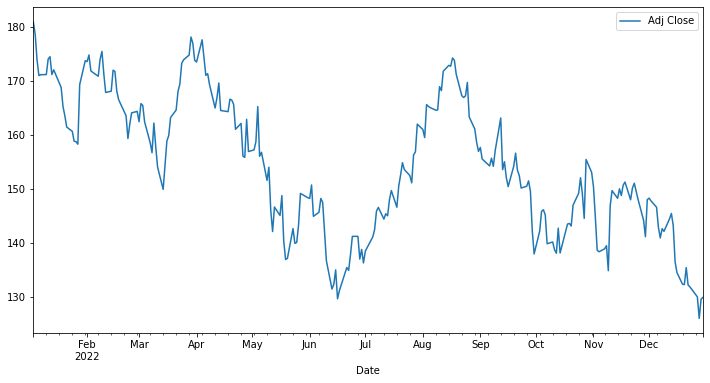

In [10]:
df_interpol.plot(figsize=(12,6))

In [11]:
# df_interpol = data['Adj Close'].astype(float).interpolate(method='time')
# df_interpol

In [12]:
df_interpol.isna().sum()

Adj Close    0
dtype: int64

In [13]:
from pycaret.time_series import *


/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:18: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:19: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-p

In [14]:
exp = setup(data=df_interpol, session_id=123)

,Description,Value
0,session_id,123
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(362, 1)"
5,Train data shape,"(361, 1)"
6,Test data shape,"(1, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [15]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,362.0
1,Summary,Statistics,Actual,Mean,,154.206577
2,Summary,Statistics,Actual,Median,,153.398862
3,Summary,Statistics,Actual,Standard Deviation,,12.70242
4,Summary,Statistics,Actual,Variance,,161.351473
5,Summary,Statistics,Actual,Kurtosis,,-1.028192
6,Summary,Statistics,Actual,Skewness,,0.000466
7,Summary,Statistics,Actual,# Distinct Values,,356.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",4274.057872
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",4944.836878


In [17]:
top10 = compare_models(
    turbo=False,
    n_select=10,
    sort='RMSE'
)

IntProgress(value=0, description='Processing: ', max=169)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:33:29
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,LGBMRegressor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,TT (Sec)
auto_arima,Auto ARIMA,2.5648,2.5648,0.0201,0.0200,0.4582,0.3756,1.0800
bats,BATS,2.6301,2.6301,0.0206,0.0206,0.4697,0.3851,5.3967
naive,Naive Forecaster,2.6725,2.6725,0.0209,0.0209,0.4773,0.3913,1.5467
tbats,TBATS,2.8647,2.8647,0.0224,0.0224,0.5116,0.4194,9.3400
ets,ETS,2.9768,2.9768,0.0233,0.0233,0.5316,0.4359,0.0533
exp_smooth,Exponential Smoothing,2.9770,2.9770,0.0233,0.0233,0.5316,0.4359,0.0700
theta,Theta Forecaster,3.0095,3.0095,0.0235,0.0235,0.5375,0.4407,0.0367
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,3.0220,3.0220,0.0236,0.0235,0.5397,0.4425,0.0367
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,3.1496,3.1496,0.0246,0.0246,0.5625,0.4612,0.1833
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,3.1590,3.1590,0.0247,0.0246,0.5642,0.4626,0.5167


/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/

	 y_train: [Period('2022-01-03', 'D') Period('2022-01-04', 'D')
 Period('2022-01-05', 'D') Period('2022-01-06', 'D')
 Period('2022-01-07', 'D') Period('2022-01-08', 'D')
 Period('2022-01-09', 'D') Period('2022-01-10', 'D')
 Period('2022-01-11', 'D') Period('2022-01-12', 'D')
 Period('2022-01-13', 'D') Period('2022-01-14', 'D')
 Period('2022-01-15', 'D') Period('2022-01-16', 'D')
 Period('2022-01-17', 'D') Period('2022-01-18', 'D')
 Period('2022-01-19', 'D') Period('2022-01-20', 'D')
 Period('2022-01-21', 'D') Period('2022-01-22', 'D')
 Period('2022-01-23', 'D') Period('2022-01-24', 'D')
 Period('2022-01-25', 'D') Period('2022-01-26', 'D')
 Period('2022-01-27', 'D') Period('2022-01-28', 'D')
 Period('2022-01-29', 'D') Period('2022-01-30', 'D')
 Period('2022-01-31', 'D') Period('2022-02-01', 'D')
 Period('2022-02-02', 'D') Period('2022-02-03', 'D')
 Period('2022-02-04', 'D') Period('2022-02-05', 'D')
 Period('2022-02-06', 'D') Period('2022-02-07', 'D')
 Period('2022-02-08', 'D') Period('

/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/

	 y_train: [Period('2022-01-03', 'D') Period('2022-01-04', 'D')
 Period('2022-01-05', 'D') Period('2022-01-06', 'D')
 Period('2022-01-07', 'D') Period('2022-01-08', 'D')
 Period('2022-01-09', 'D') Period('2022-01-10', 'D')
 Period('2022-01-11', 'D') Period('2022-01-12', 'D')
 Period('2022-01-13', 'D') Period('2022-01-14', 'D')
 Period('2022-01-15', 'D') Period('2022-01-16', 'D')
 Period('2022-01-17', 'D') Period('2022-01-18', 'D')
 Period('2022-01-19', 'D') Period('2022-01-20', 'D')
 Period('2022-01-21', 'D') Period('2022-01-22', 'D')
 Period('2022-01-23', 'D') Period('2022-01-24', 'D')
 Period('2022-01-25', 'D') Period('2022-01-26', 'D')
 Period('2022-01-27', 'D') Period('2022-01-28', 'D')
 Period('2022-01-29', 'D') Period('2022-01-30', 'D')
 Period('2022-01-31', 'D') Period('2022-02-01', 'D')
 Period('2022-02-02', 'D') Period('2022-02-03', 'D')
 Period('2022-02-04', 'D') Period('2022-02-05', 'D')
 Period('2022-02-06', 'D') Period('2022-02-07', 'D')
 Period('2022-02-08', 'D') Period('

/Users/grant/opt/anaconda3/lib/python3.9/site-packages/pycaret/containers/models/time_series.py:2646: UserWarning: Exception occurred in ProphetPeriodPatched predict method during conversion from DatetimeIndex to PeriodIndex: 
You must pass a freq argument as current index has none.
  warnings.warn(
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/pycaret/containers/models/time_series.py:2646: UserWarning: Exception occurred in ProphetPeriodPatched predict method during conversion from DatetimeIndex to PeriodIndex: 
You must pass a freq argument as current index has none.
  warnings.warn(
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/pycaret/containers/models/time_series.py:2646: UserWarning: Exception occurred in ProphetPeriodPatched predict method during conversion from DatetimeIndex to PeriodIndex: 
You must pass a freq argument as current index has none.
  warnings.warn(
/Users/grant/opt/anaconda3/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: Futu

: 

: 